## 1. Loading libraries and data


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import math
import calendar
import statistics
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('data/raw_data.xlsx', skiprows=0)

In [3]:
df

,Unnamed: 0,date,fixing I course (PLN/MWh),CO2 PLN,Krajowe zapotrzebowanie na moc,Generacja zrodel wiatrowych
0,0,2017-06-01 00:00:00,128.25,21.24,NaN,NaN
1,1,2017-06-01 01:00:00,111.26,21.24,NaN,NaN
2,2,2017-06-01 02:00:00,107.32,21.24,NaN,NaN
3,3,2017-06-01 03:00:00,106.87,21.24,NaN,NaN
4,4,2017-06-01 04:00:00,104.56,21.24,NaN,NaN
...,...,...,...,...,...,...
31339,31339,2020-12-27 19:00:00,198.81,143.76,18254.0,5645.0
31340,31340,2020-12-27 20:00:00,195.00,143.76,18242.0,5669.0
31341,31341,2020-12-27 21:00:00,186.03,143.76,18021.0,5518.0
31342,31342,2020-12-27 22:00:00,174.75,143.76,17370.0,5625.0


## 2. Preparing data for analysis

### 2.1. Data preprocessing

In [4]:
del df['Unnamed: 0']
del df['CO2 PLN']
df = df.rename(columns={"Krajowe zapotrzebowanie na moc": "domestic electricity demand"})
df = df.rename(columns={"Generacja zrodel wiatrowych": "generation of energy from wind sources"})
df = df.rename(columns={"fixing I course (PLN/MWh)": "value"})

In [5]:
df

,date,value,domestic electricity demand,generation of energy from wind sources
0,2017-06-01 00:00:00,128.25,NaN,NaN
1,2017-06-01 01:00:00,111.26,NaN,NaN
2,2017-06-01 02:00:00,107.32,NaN,NaN
3,2017-06-01 03:00:00,106.87,NaN,NaN
4,2017-06-01 04:00:00,104.56,NaN,NaN
...,...,...,...,...
31339,2020-12-27 19:00:00,198.81,18254.0,5645.0
31340,2020-12-27 20:00:00,195.00,18242.0,5669.0
31341,2020-12-27 21:00:00,186.03,18021.0,5518.0
31342,2020-12-27 22:00:00,174.75,17370.0,5625.0


In [6]:
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek
df['date_normalize'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d') 

def label_weekday(row):
    
    if row['day_of_week'] == 0:
        return 'Monday'
    if row['day_of_week'] == 1:
        return 'Tuesday'
    if row['day_of_week'] == 2:
        return 'Wednesday'
    if row['day_of_week'] == 3:
        return 'Thursday'
    if row['day_of_week'] == 4:
        return 'Friday'
    if row['day_of_week'] == 5:
        return 'Saturday'
    if row['day_of_week'] == 6:
        return 'Sunday'


def is_holiday(row):
    if row['weekday'] == 'Sunday':
        return 1
    else:
        return 0
df['weekday'] = df.apply(lambda row: label_weekday(row), axis=1)
df['holiday'] = df.apply(lambda row: is_holiday(row), axis=1)


def polish_label_holidays(row):
    
    if row['holiday'] == 0 and (row['date_normalize']=='2018-01-01' or row['date_normalize']=='2018-01-06'
    or row['date_normalize']=='2018-04-01' or row['date_normalize']=='2018-04-02' or row['date_normalize']=='2018-05-01' 
    or row['date_normalize']=='2018-05-03' or row['date_normalize']=='2018-05-31' or row['date_normalize']=='2018-08-15' 
    or row['date_normalize']=='2018-11-01' or row['date_normalize']=='2018-11-11' or row['date_normalize']=='2018-12-25' 
    or row['date_normalize']=='2018-12-26' or row['date_normalize']=='2019-01-01' or row['date_normalize']=='2019-01-06'
    or row['date_normalize']=='2019-04-21' or row['date_normalize']=='2019-04-22' or row['date_normalize']=='2019-05-01'
    or row['date_normalize']=='2019-05-03' or row['date_normalize']=='2019-06-09' or row['date_normalize']=='2019-06-20'
    or row['date_normalize']=='2019-08-15' or row['date_normalize']=='2019-11-01' or row['date_normalize']=='2019-11-11'
    or row['date_normalize']=='2019-12-25' or row['date_normalize']=='2019-12-26' or row['date_normalize']=='2020-01-01'
    or row['date_normalize']=='2020-01-06' or row['date_normalize']=='2020-04-12' or row['date_normalize']=='2020-04-13'
    or row['date_normalize']=='2020-05-01' or row['date_normalize']=='2020-05-03' or row['date_normalize']=='2020-06-11'
    or row['date_normalize']=='2020-08-15' or row['date_normalize']=='2020-11-11' or row['date_normalize']=='2020-12-25'
    or row['date_normalize']=='2020-12-26'):
        return 1
    
    if row['holiday'] == 1:
        return 1
    else:
        return 0
   
    
df['holiday'] = df.apply(lambda row: polish_label_holidays(row), axis=1)
df['hour'] = df.date.dt.hour

def label_hour(row):   #day code - for hours from 6 am to 11 pm - 1, for other hours - 0
    
    if row['hour'] >= 6 and row['hour'] <= 22:
        return 1
    
    else:
        return 0
   
    
df['code of the day'] = df.apply(lambda row: label_hour(row), axis=1)

#del df['hour']
del df['weekday']
#del df['date_normalize']
del df['day_of_week']

In [7]:
df

,date,value,domestic electricity demand,generation of energy from wind sources,date_normalize,holiday,hour,code of the day
0,2017-06-01 00:00:00,128.25,NaN,NaN,2017-06-01,0,0,0
1,2017-06-01 01:00:00,111.26,NaN,NaN,2017-06-01,0,1,0
2,2017-06-01 02:00:00,107.32,NaN,NaN,2017-06-01,0,2,0
3,2017-06-01 03:00:00,106.87,NaN,NaN,2017-06-01,0,3,0
4,2017-06-01 04:00:00,104.56,NaN,NaN,2017-06-01,0,4,0
...,...,...,...,...,...,...,...,...
31339,2020-12-27 19:00:00,198.81,18254.0,5645.0,2020-12-27,1,19,1
31340,2020-12-27 20:00:00,195.00,18242.0,5669.0,2020-12-27,1,20,1
31341,2020-12-27 21:00:00,186.03,18021.0,5518.0,2020-12-27,1,21,1
31342,2020-12-27 22:00:00,174.75,17370.0,5625.0,2020-12-27,1,22,1


### 2.2. Generate lags

In [8]:
input_dim = 336


def generate_time_lags(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"value lag{n}"] = df_n["value"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n
    
        
def generation_domestic_electricity_demand_lags(df, n_lags):

    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"domestic electricity demand lag{n}"] = df_n["domestic electricity demand"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n
    
    

def generation_of_energy_from_wind_sources_lags(df, n_lags):

    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"generation of energy from wind sources lag{n}"] = df_n["generation of energy from wind sources"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n
 
df = generate_time_lags(df, input_dim)
df = generation_of_energy_from_wind_sources_lags(df, input_dim)
df = generation_domestic_electricity_demand_lags(df, input_dim)

for n in range(1,337):
    if n == 24 or n== 48 or n== 72 or n== 96 or n== 120 or n== 144 or n== 168 or n== 336:
        continue
    else:
        del df[f'value lag{n}']
        del df[f'generation of energy from wind sources lag{n}']
        del df[f'domestic electricity demand lag{n}']
        

In [9]:
df = df[df['date']>='2018-01-01 01:00:00']

In [10]:
df

,date,value,domestic electricity demand,generation of energy from wind sources,date_normalize,holiday,hour,code of the day,value lag24,value lag48,...,generation of energy from wind sources lag168,generation of energy from wind sources lag336,domestic electricity demand lag24,domestic electricity demand lag48,domestic electricity demand lag72,domestic electricity demand lag96,domestic electricity demand lag120,domestic electricity demand lag144,domestic electricity demand lag168,domestic electricity demand lag336
5137,2018-01-01 01:00:00,117.00,14586.0,3938.0,2018-01-01,1,1,0,98.00,121.03,...,5042.0,130.0,15048.0,15984.0,16093.0,16198.0,14063.0,13451.0,13482.0,16716.0
5138,2018-01-01 02:00:00,113.59,14453.0,3876.0,2018-01-01,1,2,0,82.00,121.03,...,5091.0,128.0,14295.0,15325.0,15383.0,15378.0,13525.0,12903.0,12995.0,16189.0
5139,2018-01-01 03:00:00,97.00,13692.0,3897.0,2018-01-01,1,3,0,76.14,121.03,...,4999.0,119.0,14110.0,14971.0,15229.0,15136.0,13204.0,12755.0,12587.0,16108.0
5140,2018-01-01 04:00:00,89.00,13329.0,4091.0,2018-01-01,1,4,0,74.70,121.03,...,4884.0,116.0,13961.0,14920.0,15160.0,15055.0,13243.0,12638.0,12276.0,16250.0
5141,2018-01-01 05:00:00,75.00,13168.0,4197.0,2018-01-01,1,5,0,73.78,121.03,...,4673.0,110.0,13910.0,15013.0,15372.0,15158.0,13319.0,12787.0,12228.0,16819.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31339,2020-12-27 19:00:00,198.81,18254.0,5645.0,2020-12-27,1,19,1,204.91,238.56,...,2653.0,197.0,17184.0,16568.0,16697.0,24065.0,24401.0,24650.0,20594.0,20903.0
31340,2020-12-27 20:00:00,195.00,18242.0,5669.0,2020-12-27,1,20,1,212.91,226.30,...,2611.0,235.0,17339.0,16608.0,16535.0,23724.0,24123.0,24361.0,20472.0,20810.0
31341,2020-12-27 21:00:00,186.03,18021.0,5518.0,2020-12-27,1,21,1,212.91,220.44,...,2435.0,250.0,17077.0,16381.0,16286.0,23029.0,23324.0,23697.0,20087.0,20090.0
31342,2020-12-27 22:00:00,174.75,17370.0,5625.0,2020-12-27,1,22,1,207.89,214.67,...,2266.0,252.0,16479.0,16050.0,16124.0,21560.0,21806.0,22177.0,19237.0,19173.0


In [11]:
rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]

In [12]:
rows_with_nan

[]

In [13]:
df2018 = df[df['date']<'2019-01-01 00:00:00'].reset_index(drop=True)
df2019 = df[df['date']<'2020-01-01 00:00:00'].reset_index(drop=True)
df2020 = df[df['date']>='2020-01-01 00:00:00'].reset_index(drop=True)


### 2.3. Checking outliers 

In [14]:
df2019

,date,value,domestic electricity demand,generation of energy from wind sources,date_normalize,holiday,hour,code of the day,value lag24,value lag48,...,generation of energy from wind sources lag168,generation of energy from wind sources lag336,domestic electricity demand lag24,domestic electricity demand lag48,domestic electricity demand lag72,domestic electricity demand lag96,domestic electricity demand lag120,domestic electricity demand lag144,domestic electricity demand lag168,domestic electricity demand lag336
0,2018-01-01 01:00:00,117.00,14586.0,3938.0,2018-01-01,1,1,0,98.00,121.03,...,5042.0,130.0,15048.0,15984.0,16093.0,16198.0,14063.0,13451.0,13482.0,16716.0
1,2018-01-01 02:00:00,113.59,14453.0,3876.0,2018-01-01,1,2,0,82.00,121.03,...,5091.0,128.0,14295.0,15325.0,15383.0,15378.0,13525.0,12903.0,12995.0,16189.0
2,2018-01-01 03:00:00,97.00,13692.0,3897.0,2018-01-01,1,3,0,76.14,121.03,...,4999.0,119.0,14110.0,14971.0,15229.0,15136.0,13204.0,12755.0,12587.0,16108.0
3,2018-01-01 04:00:00,89.00,13329.0,4091.0,2018-01-01,1,4,0,74.70,121.03,...,4884.0,116.0,13961.0,14920.0,15160.0,15055.0,13243.0,12638.0,12276.0,16250.0
4,2018-01-01 05:00:00,75.00,13168.0,4197.0,2018-01-01,1,5,0,73.78,121.03,...,4673.0,110.0,13910.0,15013.0,15372.0,15158.0,13319.0,12787.0,12228.0,16819.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17514,2019-12-31 19:00:00,185.00,18936.0,3826.0,2019-12-31,0,19,1,171.63,199.51,...,722.0,3045.0,21250.0,19197.0,20245.0,20514.0,16412.0,15833.0,16340.0,24116.0
17515,2019-12-31 20:00:00,172.28,18054.0,3827.0,2019-12-31,0,20,1,171.74,202.68,...,717.0,3095.0,20992.0,19054.0,19956.0,20219.0,16469.0,15943.0,15859.0,23812.0
17516,2019-12-31 21:00:00,157.63,16938.0,3674.0,2019-12-31,0,21,1,160.71,199.51,...,702.0,3113.0,20586.0,18475.0,19496.0,19663.0,16326.0,15779.0,15770.0,22953.0
17517,2019-12-31 22:00:00,149.99,16249.0,3474.0,2019-12-31,0,22,1,135.98,189.16,...,668.0,3071.0,19339.0,18108.0,18387.0,18627.0,15875.0,15348.0,15711.0,21635.0


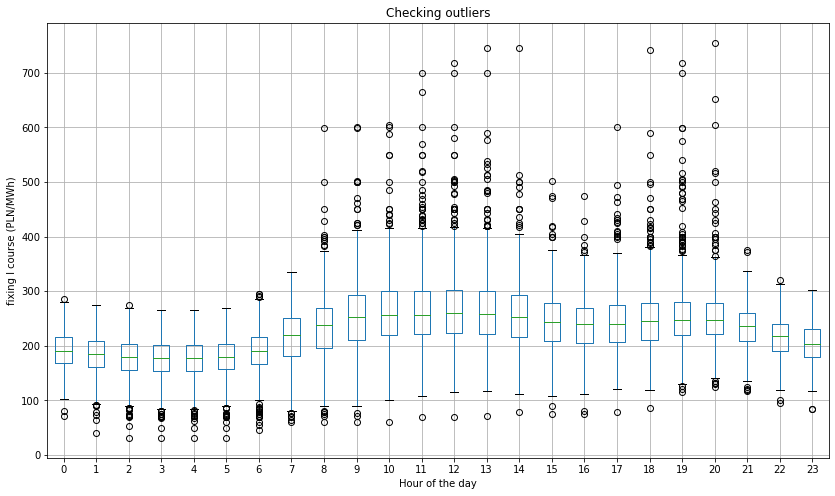

In [15]:
# box-plot for checking outliers in individual hours for 2019
outpoints_hourly_2019 = df2019.pivot_table(index='date_normalize', 
                     columns=df2019['hour'], 
                     values='value', 
                     aggfunc='mean').boxplot(figsize=(14,8)).set(title = "Checking outliers", xlabel = "Hour of the day", ylabel = "fixing I course (PLN/MWh)")

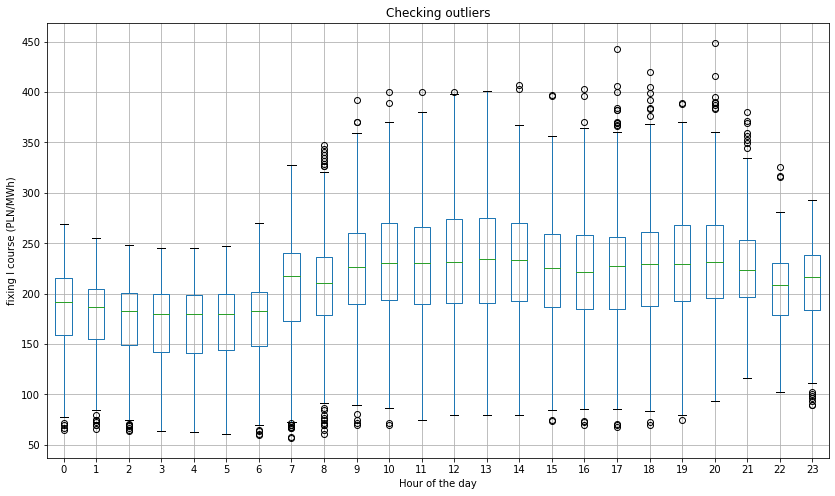

In [16]:
# box-plot for checking outliers in individual hours for 2020
outpoints_hourly_2020 = df2020.pivot_table(index='date_normalize', 
                     columns=df2020['hour'], 
                     values='value', 
                     aggfunc='mean').boxplot(figsize=(14,8)).set(title = "Checking outliers", xlabel = "Hour of the day", ylabel = "fixing I course (PLN/MWh)")

In [ ]:
#df.to_excel("data\data.xlsx") 

## 3. Analysis of the time series of electricity prices at the Polish Power Exchange Day Ahead Market

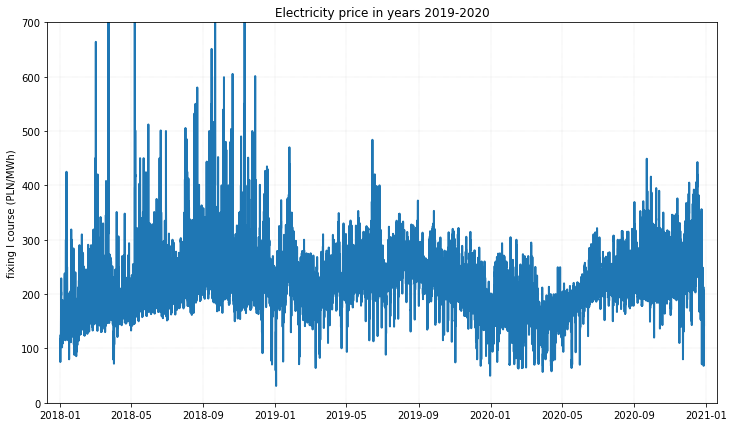

In [18]:
fig = plt.subplots(figsize=(12,7))

plt.plot(df['date'], df['value'], label = 'line 1',
        linewidth=2.0)

# plt.fill_between(df2019_daily['date_normalize'], df2019_daily['fixing I course (PLN/MWh)'], alpha=0.2)
plt.title('Electricity price in years 2019-2020',fontsize=12)
my_xticks = np.array(df['date_normalize'])
# frequency = 30
# plt.xticks(my_xticks[::frequency], my_xticks[::frequency], rotation=60)
plt.ylabel("fixing I course (PLN/MWh)")
plt.margins(0.02)
plt.ylim(120,270, 30)
plt.yticks(np.arange(0, 750, 100))

plt.grid(color='gray', linestyle=':', linewidth=0.35, alpha=0.6, axis='both')

plt.show()

In [22]:
smallest_hourly_fixing_price_2019 = min(df2019['value'])
print('The lowest hourly electricity price in 2019 is: ', smallest_hourly_fixing_price_2019, "PLN/MWh")
biggest_hourly_fixing_price_2019 = max(df2019['value'])
print('The largest hourly electricity price in 2019 is: ', biggest_hourly_fixing_price_2019, "PLN/MWh")
average_hourly_fixing_price_2019 = statistics.mean(df2019['value'])
print('Average hourly electricity price in 2019 is: ', average_hourly_fixing_price_2019, "PLN/MWh")

The lowest hourly electricity price in 2019 is:  31.0 PLN/MWh
The largest hourly electricity price in 2019 is:  755.0 PLN/MWh
Average hourly electricity price in 2019 is:  226.87830412694788 PLN/MWh


In [23]:
smallest_hourly_fixing_price_2020 = min(df2020['value'])
print('The lowest hourly electricity price in 2020 is: ', smallest_hourly_fixing_price_2020, "PLN/MWh")
biggest_hourly_fixing_price_2020 = max(df2020['value'])
print('The largest hourly electricity price in 2020 is: ', biggest_hourly_fixing_price_2020, "PLN/MWh")
average_hourly_fixing_price_2020 = statistics.mean(df2020['value'])
print('Average hourly electricity price in 2020 is: ', average_hourly_fixing_price_2020, "PLN/MWh")

The lowest hourly electricity price in 2020 is:  56.73 PLN/MWh
The largest hourly electricity price in 2020 is:  449.0 PLN/MWh
Average hourly electricity price in 2020 is:  209.33489640883977 PLN/MWh


In [28]:
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm

def tsdisplay(y, figsize = (26, 18), title = "", lags = 168):
    tmp_data = pd.Series(y)
    fig = plt.figure(figsize = figsize)

    #Plot the PACF:
    plt.rc("figure", figsize=(13,5))
    _ = sm.graphics.tsa.plot_acf(tmp_data, lags = 168, zero = True)
    _ = plt.xticks(np.arange(0,  lags+1, 8))
    plt.title("")
    plt.xticks(rotation=30)
    plt.grid(color='#dcdcdc', linestyle=':', linewidth=0.35, alpha=0.2, axis='both')
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=13.3)
    
    plt.xlabel("Hour", fontsize=14)
  
    plt.show()

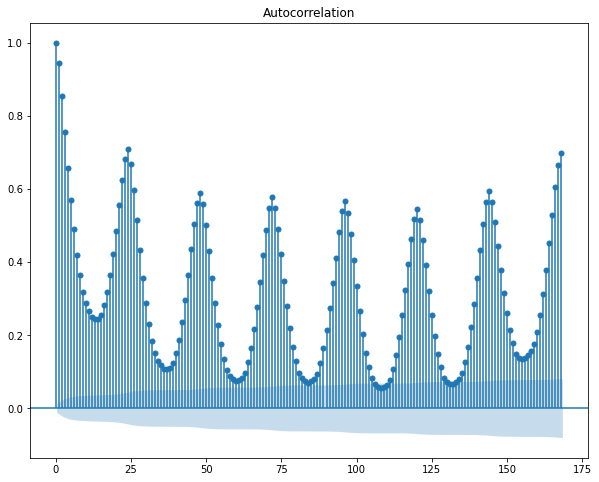

In [29]:
import statsmodels.api as sm
from matplotlib.collections import PolyCollection

curr_fig, curr_ax = plt.subplots(figsize=(10, 8))

sm.graphics.tsa.plot_acf(df['value'].squeeze(), lags=168, ax=curr_ax)
#get polygon patch collections and change their color


plt.show()